In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
dt= pd.read_csv(r'C:\Users\MONTU\Desktop\data science videos\project\stock prrice\Google_Stock_Price_train.csv', 
                index_col='Date', parse_dates=True)
dt

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [3]:
dt.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [4]:
dt.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


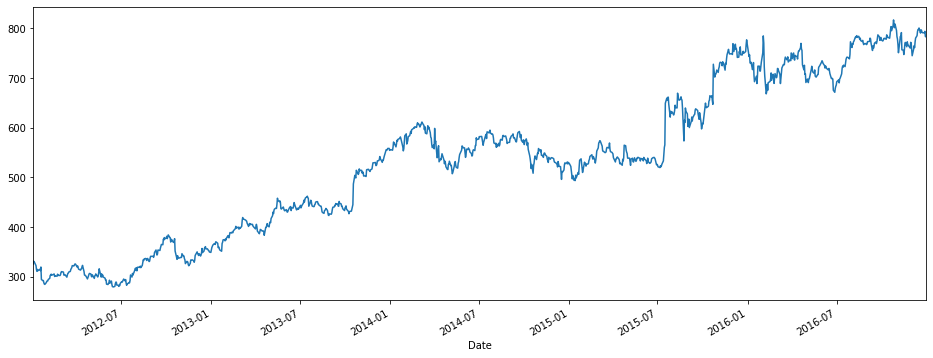

In [6]:
dt['Open'].plot(figsize=(16,6))

In [7]:
#converting the class 'object' into 'float'

dt['Close']= dt['Close'].str.replace(',','').astype(float)

In [8]:
dt['Volume']= dt['Volume'].str.replace(',','').astype(float)

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null float64
Volume    1258 non-null float64
dtypes: float64(5)
memory usage: 59.0 KB


In [10]:
#7 day rolling mean
#in this the mean is taking for each column for every 7 days

dt.rolling(7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2016-12-23,794.831429,797.558571,789.387143,793.571429,1.294329e+06
2016-12-27,793.880000,796.824286,788.635714,792.671429,1.174700e+06
2016-12-28,792.922857,795.877143,787.622857,791.850000,9.904143e+05


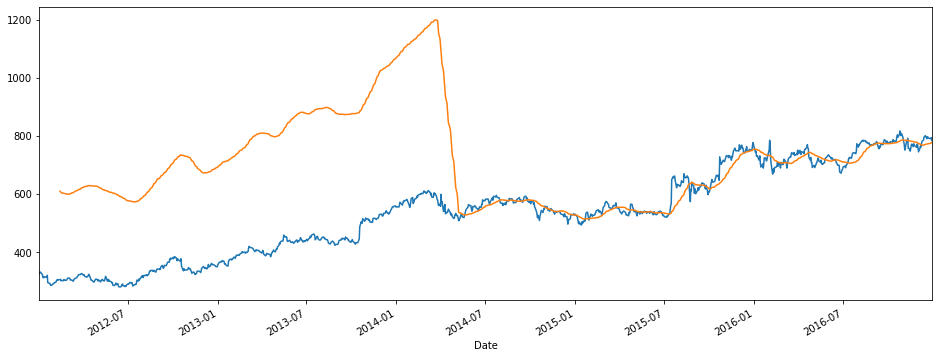

In [11]:
dt['Open'].plot(figsize=(16,6))
dt.rolling(window=30).mean()['Close'].plot()

#the rolling mean in represented in orange 
#this gives the moving avergae of the closing stock over the past 30 days(window=30)

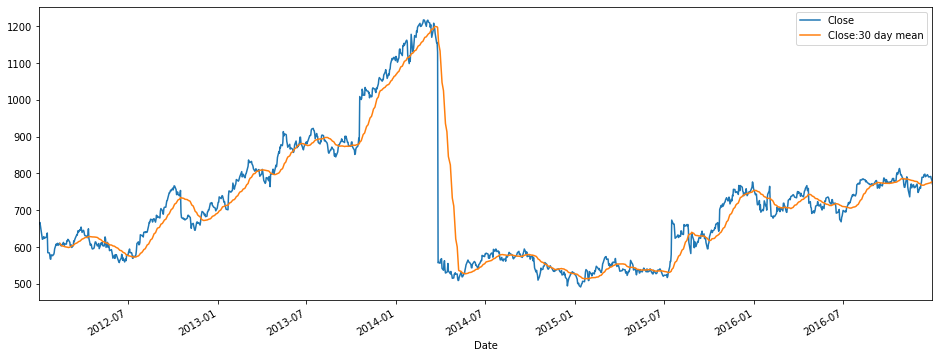

In [12]:
dt['Close:30 day mean']= dt['Close'].rolling(window=30).mean()
dt[['Close','Close:30 day mean']].plot(figsize=(16,6))

#this gives usa a comparison of the closing stock w.r.t the rolling mean of the closing stock

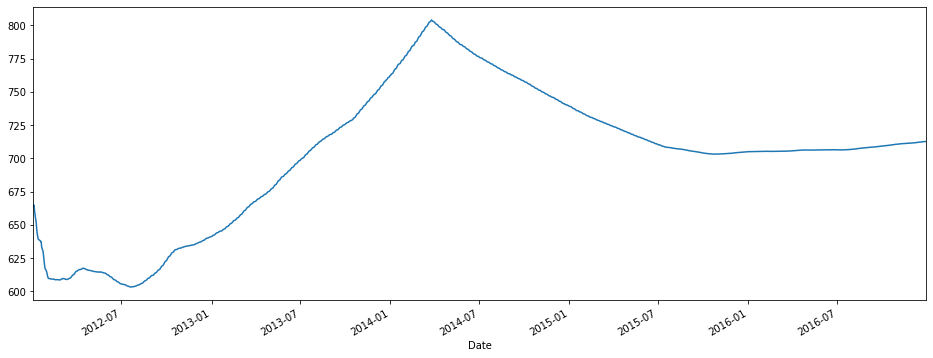

In [13]:
dt['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

#peroids=1 indicate that the min number of observation per window(30 days) = 1

In [14]:
training_set=dt['Open']
training_set= pd.DataFrame(training_set)

In [15]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range= (0,1))
scaled_training_set= sc.fit_transform(training_set)

In [16]:
#creating a data structure with 60 timestamps and 1 output

xtrain=[]
ytrain=[]

for i in range(60, 1258):   #(60,1258) since timestamp is of 60 days and length of dtaset is 1258
    xtrain.append(scaled_training_set[i-60:i, 0])   #if i=61, then data starts from 1st day(61-60) to the 60th day
    ytrain.append(scaled_training_set[i, 0])        # here if i=61, it means that prediction is made for the 61st day

x_train, y_train= np.array(xtrain), np.array(ytrain)


#in this data is taken from day 1 to 60 and predict on the 61st day
#lly, we take data from day 2 to day 61 and predict on the 62nd day

In [17]:
#reshaping

x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [18]:
x_train.shape

(1198, 60, 1)

In [19]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [20]:
#initialising RNN

model=Sequential()


In [21]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [23]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0419
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0052
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0047
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - 

In [24]:
#predictions

dt_test= pd.read_csv(r'C:\Users\MONTU\Desktop\data science videos\project\stock prrice\Google_Stock_Price_Test.csv',
                     index_col='Date', parse_dates=True)

In [25]:
dt_test

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"
2017-01-10,807.86,809.13,803.51,804.79,"1,176,800"
2017-01-11,805.00,808.15,801.37,807.91,"1,065,900"
2017-01-12,807.14,807.39,799.17,806.36,"1,353,100"
2017-01-13,807.48,811.22,806.69,807.88,"1,099,200"


In [26]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
Open      20 non-null float64
High      20 non-null float64
Low       20 non-null float64
Close     20 non-null float64
Volume    20 non-null object
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [27]:
real_stock_price= dt_test.iloc[:, 1:2].values

In [28]:
dt_test['Volume']= dt_test['Volume'].str.replace(',','').astype(float)

In [29]:
testing_set=dt['Open']
testing_set= pd.DataFrame(testing_set)

In [34]:
# Getting the predicted stock price of 2017
dt_total = pd.concat((dt['Open'], dt_test['Open']), axis = 0)
inputs = dt_total[len(dt_total) - len(dt_test) - 60:].values  #this is in order to create a timestamp of 60
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  #this inverses the matrix form

In [39]:
#inputs = dt_total[len(dt_total) - len(dt_test) - 60:].values
#print(len(dt_total) - len(dt_test) - 60)

In [32]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
0    20 non-null float32
dtypes: float32(1)
memory usage: 208.0 bytes


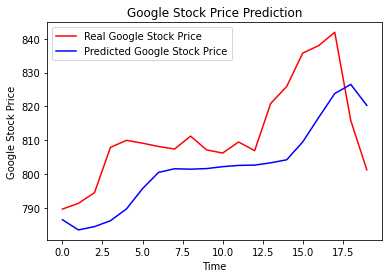

In [40]:

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
#we can infer by prediction that the stock prices go up 